In [5]:
!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

Aperçu des premières lignes du jeu de données :
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income

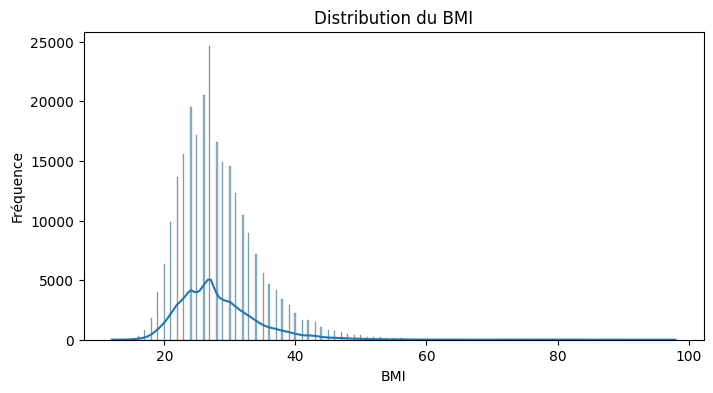

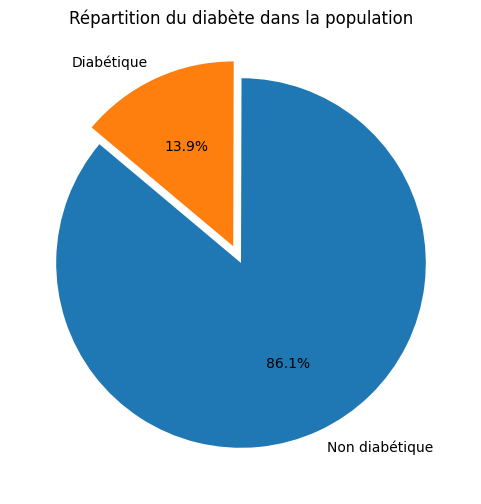

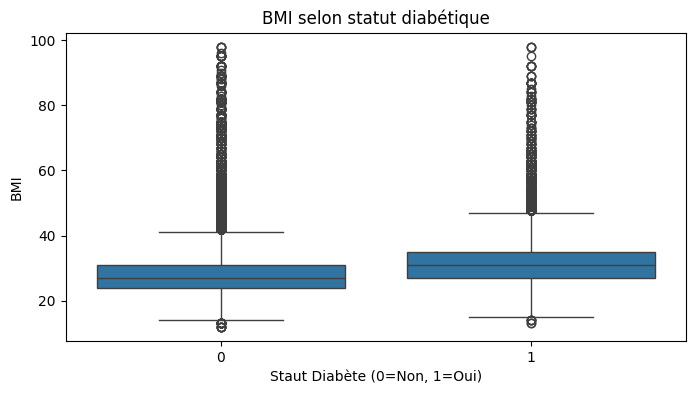

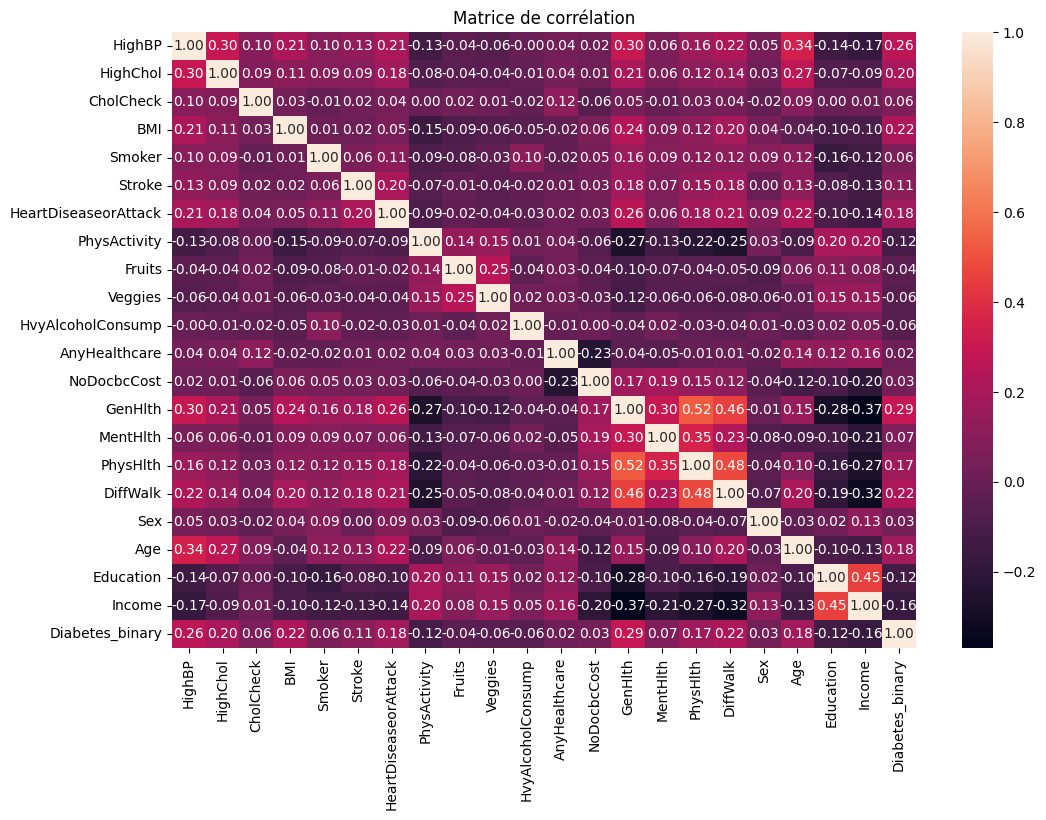

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que tu as déjà récupéré X et y comme montré
# X : features, y : target

# Fusionner features et target pour faciliter l’analyse
df = pd.concat([X, y], axis=1)

# Aperçu rapide
print("Aperçu des premières lignes du jeu de données :")
print(df.head())

# Statistiques descriptives générales
print("Statistiques descriptives :")
print(df.describe())

# Histogramme d'une variable continue (exemple : 'BMI')
plt.figure(figsize=(8,4))
sns.histplot(df['BMI'], kde=True)
plt.title('Distribution du BMI')
plt.xlabel('BMI')
plt.ylabel('Fréquence')
plt.show()

# Pourcentage de personnes diabétiques
labels = ['Non diabétique', 'Diabétique']
explode = [0, 0.1]
sizes = df['Diabetes_binary'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Répartition du diabète dans la population')
plt.show()

# Boxplot de BMI selon diabète
plt.figure(figsize=(8,4))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title('BMI selon statut diabétique')
plt.xlabel('Staut Diabète (0=Non, 1=Oui)')
plt.ylabel('BMI')
plt.show()

# Heatmap des corrélations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()
